In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
data=pd.read_csv("kc_house_data.csv")
data = data[:2000]

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
test_set=data['sqft_living']

In [7]:
test_set1=data['price']

# Finding Min and Max of the data

### min max normalization of sqft_living

In [28]:
max1=max(test_set)
min1=min(test_set)
print("Min:",min1,"Max:",max1)
n=len(test_set.index)
list1=[]
minmax=[]
for i in range(0,n):
    v=test_set[i]
    n_v=(v-min1)/(max1-min1)
    list1.append([v,n_v])
    minmax.append(n_v)
        
min_max_norm=pd.DataFrame(list1,columns=["Value","Normalized value"])
min_max_norm

Min: 380 Max: 8010


,Value,Normalized value
0,1180,0.104849
1,2570,0.287025
2,770,0.051114
3,1960,0.207077
4,1680,0.170380
...,...,...
1995,1890,0.197903
1996,1010,0.082569
1997,1010,0.082569
1998,2340,0.256881


### Min max normalization of price

In [9]:
max1=max(test_set1)
min1=min(test_set1)
print("Min:",min1,"Max:",max1)
n=len(test_set1.index)
list1=[]
minmax1=[]
for i in range(0,n):
    v=test_set1[i]
    n_v=(v-min1)/(max1-min1)
    list1.append([v,n_v])
    minmax1.append(n_v)
        
min_max_norm1=pd.DataFrame(list1,columns=["Value","Normalized value"])
min_max_norm1

Min: 75000.0 Max: 5350000.0


,Value,Normalized value
0,221900.0,0.027848
1,538000.0,0.087773
2,180000.0,0.019905
3,604000.0,0.100284
4,510000.0,0.082464
...,...,...
1995,307000.0,0.043981
1996,194000.0,0.022559
1997,180000.0,0.019905
1998,465000.0,0.073934


## Z score

### z score normalization of sqft_living

In [10]:
mean=sum(test_set)/len(test_set)

In [11]:
var  = sum(pow(x-mean,2) for x in test_set) / len(test_set) 
deviations = math.sqrt(var)

In [12]:
print("Mean:",mean,"\nStandard deviation:",deviations)

Mean: 2074.3585 
Standard deviation: 913.5015812672407


In [13]:
def zscore(v):
    vn=(v-mean)/deviations
    return vn

In [14]:
n=len(test_set.index)
list1=[]
zs=[]
for i in range(0,n):
    v=test_set[i]
    n_v=zscore(v)
    list1.append([v,n_v])
    zs.append(n_v)
        
zscore_norm=pd.DataFrame(list1,columns=["Value","Normalized value"])
zscore_norm

,Value,Normalized value
0,1180,-0.979044
1,2570,0.542573
2,770,-1.427867
3,1960,-0.125187
4,1680,-0.431700
...,...,...
1995,1890,-0.201815
1996,1010,-1.165141
1997,1010,-1.165141
1998,2340,0.290795


### z score normalization of Price

In [15]:
mean=sum(test_set1)/len(test_set1)

In [16]:
var  = sum(pow(x-mean,2) for x in test_set1) / len(test_set1) 
deviations = math.sqrt(var)


In [17]:
print("Mean:",mean,"\nStandard deviation:",deviations)

Mean: 531045.694 
Standard deviation: 375559.6839561111


In [18]:
n=len(test_set1.index)
list1=[]
zs1=[]
for i in range(0,n):
    v=test_set1[i]
    n_v=zscore(v)
    list1.append([v,n_v])
    zs1.append(n_v)
        
zscore_norm1=pd.DataFrame(list1,columns=["Value","Normalized value"])
zscore_norm1

,Value,Normalized value
0,221900.0,-0.823160
1,538000.0,0.018517
2,180000.0,-0.934727
3,604000.0,0.194255
4,510000.0,-0.056038
...,...,...
1995,307000.0,-0.596565
1996,194000.0,-0.897449
1997,180000.0,-0.934727
1998,465000.0,-0.175859


In [19]:
def minmax(v):
    vn = (((v-minF)/(maxF-minF))*(1-0))+0
    return vn

In [20]:
mean = sum(test_set)/len(test_set)

In [21]:
var = sum(pow(x-mean,2) for x in test_set) / len(test_set) 
deviations = math.sqrt(var)

In [22]:
print(mean, deviations)

2074.3585 913.5015812672407


In [23]:
def zscore(v):
    vn=(v-mean)/deviations
    return vn

# Decimal Scaling

### decimal scaling normalization of sqft_living

In [24]:
def countDigit(n):
    if n == 0:
        return 0
    return 1 + countDigit(n // 10)

In [25]:
j=countDigit(max(test_set))
n=len(test_set.index)
list1=[]
ds=[]
for i in range(0,n):
    v=test_set[i]
    n_v=v/10**j
    list1.append([v,n_v])
    ds.append(n_v)
        
decimal_scaling=pd.DataFrame(list1,columns=["Value","Normalized value"])
decimal_scaling

,Value,Normalized value
0,1180,0.118
1,2570,0.257
2,770,0.077
3,1960,0.196
4,1680,0.168
...,...,...
1995,1890,0.189
1996,1010,0.101
1997,1010,0.101
1998,2340,0.234


### decimal scaling normalization of price

In [26]:
j=countDigit(max(test_set1))
n=len(test_set1.index)
list1=[]
ds1=[]
for i in range(0,n):
    v=test_set1[i]
    n_v=v/10**j
    list1.append([v,n_v])
    ds1.append(n_v)
        
decimal_scaling1=pd.DataFrame(list1,columns=["Value","Normalized value"])
decimal_scaling1

,Value,Normalized value
0,221900.0,0.02219
1,538000.0,0.05380
2,180000.0,0.01800
3,604000.0,0.06040
4,510000.0,0.05100
...,...,...
1995,307000.0,0.03070
1996,194000.0,0.01940
1997,180000.0,0.01800
1998,465000.0,0.04650


## Comparison of normalization techniques

### Sqft_living

In [29]:
n=len(test_set.index)
list1=[]
for i in range(0,n):
    v=test_set[i]
    nv_ds=ds[i]
    nv_minmax=minmax[i]
    nv_zs=zs[i]
    list1.append([v,nv_ds,nv_minmax,nv_zs])
df2=pd.DataFrame(list1,columns=["Value","Decimal Scaling","Min Max","Z Score"])
df2

,Value,Decimal Scaling,Min Max,Z Score
0,1180,0.118,0.104849,-0.979044
1,2570,0.257,0.287025,0.542573
2,770,0.077,0.051114,-1.427867
3,1960,0.196,0.207077,-0.125187
4,1680,0.168,0.170380,-0.431700
...,...,...,...,...
1995,1890,0.189,0.197903,-0.201815
1996,1010,0.101,0.082569,-1.165141
1997,1010,0.101,0.082569,-1.165141
1998,2340,0.234,0.256881,0.290795


### Price

In [30]:
n=len(test_set1.index)
list1=[]
for i in range(0,n):
    v=test_set1[i]
    nv_ds=ds1[i]
    nv_minmax=minmax1[i]
    nv_zs=zs1[i]
    list1.append([v,nv_ds,nv_minmax,nv_zs])
df2=pd.DataFrame(list1,columns=["Value","Decimal Scaling","Min Max","Z Score"])
df2

,Value,Decimal Scaling,Min Max,Z Score
0,221900.0,0.02219,0.027848,-0.823160
1,538000.0,0.05380,0.087773,0.018517
2,180000.0,0.01800,0.019905,-0.934727
3,604000.0,0.06040,0.100284,0.194255
4,510000.0,0.05100,0.082464,-0.056038
...,...,...,...,...
1995,307000.0,0.03070,0.043981,-0.596565
1996,194000.0,0.01940,0.022559,-0.897449
1997,180000.0,0.01800,0.019905,-0.934727
1998,465000.0,0.04650,0.073934,-0.175859


## K Means

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [32]:
def euclidean(x1,y1,x2,y2):
    return math.sqrt(((x1-x2)**2)+((y1-y2)**2))

In [33]:
n=len(test_set1.index)
list2=[]
for i in range(0,n):
    unit_price_mnmx=minmax[i]
    profit_mnmx=minmax1[i]
    list2.append([unit_price_mnmx,profit_mnmx])
df3=pd.DataFrame(list2,columns=["Sqft_living normalized","Price normalized"])
df3    


,Sqft_living normalized,Price normalized
0,0.104849,0.027848
1,0.287025,0.087773
2,0.051114,0.019905
3,0.207077,0.100284
4,0.170380,0.082464
...,...,...
1995,0.197903,0.043981
1996,0.082569,0.022559
1997,0.082569,0.019905
1998,0.256881,0.073934


In [34]:
df3.shape

(2000, 2)

In [35]:
x=df3['Sqft_living normalized']
y=df3['Price normalized']

In [36]:
# Converting the selected data into points
data2=[]
for i in range(0,df3.shape[0]):
    data2.append([df3['Sqft_living normalized'].iloc[i],df3['Price normalized'].iloc[i]])
print(data2)

[[0.10484927916120576, 0.02784834123222749], [0.2870249017038008, 0.08777251184834123], [0.05111402359108781, 0.01990521327014218], [0.20707732634338138, 0.10028436018957346], [0.17038007863695936, 0.08246445497630332], [0.6605504587155964, 0.21800947867298578], [0.17496723460026212, 0.03459715639810427], [0.0891218872870249, 0.04110900473933649], [0.1834862385321101, 0.02928909952606635], [0.19790301441677588, 0.04701421800947867], [0.4167758846657929, 0.11137440758293839], [0.10222804718217562, 0.07450236966824644], [0.13761467889908258, 0.04454976303317536], [0.12975098296199214, 0.061611374407582936], [0.1874180865006553, 0.08625592417061612], [0.33682830930537355, 0.10900473933649289], [0.19790301441677588, 0.06066350710900474], [0.1598951507208388, 0.07772511848341232], [0.10747051114023591, 0.02161137440758294], [0.11402359108781127, 0.029383886255924172], [0.16251638269986893, 0.058767772511848344], [0.34993446920052423, 0.36492890995260663], [0.24770642201834864, 0.03981042654

### Elbow Method

In [37]:
import random

def euclidean(x1,y1,x2,y2):
    return math.sqrt(((x1-x2)**2)+((y1-y2)**2))

def Find_dist(data,select):
    dist_li=[]
    for i in range(len(data)):
        l1=[]
        for j in range(len(select)):
            l1.append(euclidean(data[i][0],data[i][1],select[j][0],select[j][1]))
        dist_li.append(l1)
    return dist_li

def Find_New(clust):
    K=len(clust)
    New_clusters=[]
    for i in range(K):
        sum1=0
        sum2=0
        if (len(clust[i])!=0):
            for j in range(len(clust[i])):
                sum1+=clust[i][j][0]
                sum2+=clust[i][j][1]
            new_x=sum1/len(clust[i])
            new_y=sum2/len(clust[i])
            New_clusters.append([new_x,new_y])
        else:
            New_clusters.append([0,0])
    return New_clusters    
    

def K_Means(data,K):
    print("Value of K: ",K)
    itrs=0
    selected_cents = random.sample(data,K)
    while itrs<10:
        cost_holder=0
        clusters=[[]for i in range(K)]
        Mat_dist=Find_dist(data,selected_cents)
        for i in range(len(data)):
            min_dist=min(Mat_dist[i])
            cost_holder+=(min_dist)**2
            min_ind=Mat_dist[i].index(min_dist)
            clusters[min_ind].append(data[i])

        selected_cents=Find_New(clusters)
        itrs+=1
    print()
    cost_list.append([K,cost_holder])
    print(cost_list[-1])

cost_list=[]
for Q12 in range(1,11):
    K=Q12
    K_Means(data2,K)

Value of K:  1

[1, 38.80592381528749]
Value of K:  2

[2, 18.37631742283882]
Value of K:  3

[3, 11.83745055712252]
Value of K:  4

[4, 8.869018828660947]
Value of K:  5

[5, 8.841476058360163]
Value of K:  6

[6, 6.473516262949957]
Value of K:  7

[7, 6.594574607358085]
Value of K:  8

[8, 6.099003831219687]
Value of K:  9

[9, 4.972905488893146]
Value of K:  10

[10, 5.475889572397341]


In [38]:

df_elbow=pd.DataFrame(cost_list,columns=["K","WCSS Cost"])
df_elbow


,K,WCSS Cost
0,1,38.805924
1,2,18.376317
2,3,11.837451
3,4,8.869019
4,5,8.841476
5,6,6.473516
6,7,6.594575
7,8,6.099004
8,9,4.972905
9,10,5.475890


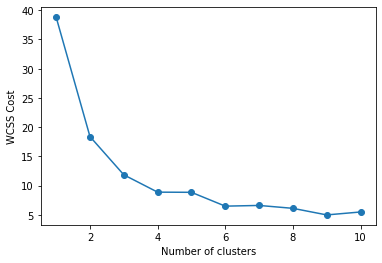

In [39]:
plt.plot(range(1, 11), df_elbow["WCSS Cost"], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Cost')
plt.show()


## K means

In [40]:
import random

def Euclidean(a,b,c,d):
    S=(a-c)**2 + (b-d)**2
    return np.sqrt(S)

def Find_dist(data,select):
    dist_li=[]
    for i in range(len(data)):
        l1=[]
        for j in range(len(select)):
            if data[i]!= select[j]:
                 l1.append(Euclidean(data[i][0],data[i][1],select[j][0],select[j][1]))
        dist_li.append(l1)
    return dist_li

def new_centroids(cluster):
    xs=0
    ys=0
    for i in range(0,len(cluster)):
        xs=xs+ cluster[i][0]
        ys=ys+cluster[i][1]
    mean_xs= xs/len(cluster)
    mean_ys= ys/len(cluster)
    new_cent=[mean_xs,mean_ys]
    return new_cent        

def Kmeans(data,K,selected_cents):
    
    clusters=[[]for i in range(K)]
    euc_dist=Find_dist(data,selected_cents)
    for i in range(len(data)):
        min_dist=min(euc_dist[i])
        min_ind=euc_dist[i].index(min_dist)
        clusters[min_ind].append(data[i])
    clust1=clusters[0]
    clust2=clusters[1]
    clust3=clusters[2]
    
    nc1= new_centroids(clust1)
    nc2= new_centroids(clust2)
    nc3= new_centroids(clust3)
    
    return nc1,nc2,nc3, clust1,clust2,clust3

In [41]:
c1=[]
c2=[]
c3=[]
nc1=[]
nc2=[]
nc3=[]
K=3

selected_cents = random.sample(data2,K)
nc1,nc2,nc3,c1,c2,c3=Kmeans(data2,K,selected_cents)
new_cents=[nc1,nc2,nc3]
nc1,nc2,nc3,c1_new,c2_new,c3_new=Kmeans(data2,K,new_cents)
new_cents=[nc1,nc2,nc3]
while(c1_new!=c1 and c2_new!=c2 and c3_new!=c3):
    c1=c1_new
    c2=c2_new
    c3=c3_new
    nc1,nc2,nc3,c1_new,c2_new,c3_new=Kmeans(data2,K,new_cents)
    new_cents=[nc1,nc2,nc3]
    


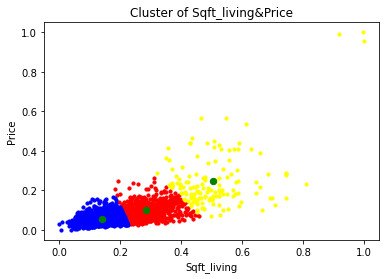

In [42]:
for i in range(0,len(c1)):
    plt.scatter(c1[i][0],c1[i][1],s=10,c='red',label='Cluster 1')
for i in range(0,len(c2)):
    plt.scatter(c2[i][0],c2[i][1],s=10,c='blue',label='Cluster 2')
for i in range(0,len(c3)):
    plt.scatter(c3[i][0],c3[i][1],s=10,c='yellow',label='Cluster 3')
plt.scatter(nc1[0],nc1[1], s = 40, c = 'green', label = 'Centroids')
plt.scatter(nc2[0],nc2[1], s = 40, c = 'green', label = 'Centroids')
plt.scatter(nc3[0],nc3[1], s = 40, c = 'green', label = 'Centroids')
plt.title("Cluster of Sqft_living&Price")
plt.xlabel("Sqft_living")
plt.ylabel("Price")
plt.show()

### K Medoid

In [72]:
def ManhattanDist (xi,yi,xj,yj):
    return (abs(xi-xj) + abs(yi-yj))

def Find_mandist(data,selected_cents):
    dist_li=[]
    for i in range(len(data)):
        l1=[]
        for j in range(0,len(selected_cents)):
            if data[i]!= selected_cents[j]:
                 l1.append(ManhattanDist(data[i][0],data[i][1],selected_cents[j][0],selected_cents[j][1]))
        dist_li.append(l1)
    return dist_li

def rep_medoid(selected_cents,visited):
    new_cent= random.sample(data2,1)
    while(new_cent in visited):
        new_cent=random.sample(data2,1)
    i=random.randrange(0,3)
    selected_cents[i]= new_cent
    return selected_cents
    


In [73]:


def kmedoid_cost(data,K,selected_cents):
    cost=0
    clusters=[[]for i in range(K)]
    Man_dist=Find_mandist(data,selected_cents)
    for i in range(len(data)):
        min_dist=min(Man_dist[i])
        cost=cost+min_dist
        min_ind=Man_dist[i].index(min_dist)
        clusters[min_ind].append(data[i])
    clust1=clusters[0]
    clust2=clusters[1]
    clust3=clusters[2]
    
    return clust1,clust2,clust3,cost
            
    

In [74]:
K=3
selected_cents = random.sample(data2,K)
c1=[]
c2=[]
c3=[]
old_cents=[]
old_c1=[]
old_c2=[]
old_c3=[]
cost=0
visited=[]
for i in range(0,len(selected_cents)):
    visited.append(selected_cents[i])
c1,c2,c3,cost= kmedoid_cost(data2,K,selected_cents)

old_cents=selected_cents
old_c1=c1
old_c2=c2
old_c3=c3
old_cost=cost
new_cent= random.sample(data2,1)
while(new_cent in visited):
    new_cent=random.sample(data2,1)
x=new_cent[0][0]
y=new_cent[0][1]
i=random.randrange(0,3)
selected_cents[i][0]=x
selected_cents[i][1]=y
new_cent1=[x,y]
c1,c2,c3,cost= kmedoid_cost(data2,K,selected_cents)

while(old_cost>=cost):
    visited.append(new_cent1)
    old_cents=selected_cents
    old_c1=c1
    old_c2=c2
    old_c3=c3
    old_cost=cost
    new_cent= random.sample(data2,1)
    while(new_cent in visited):
        new_cent=random.sample(data2,1)
    x=new_cent[0][0]
    y=new_cent[0][1]
    i=random.randrange(0,3)
    selected_cents[i][0]=x
    selected_cents[i][1]=y
    new_cent1=[x,y]
    c1,c2,c3,cost= kmedoid_cost(data2,K,selected_cents)
    
selected_cents=old_cents
cost=old_cost
c1=old_c1
c2=old_c2
c3=old_c3

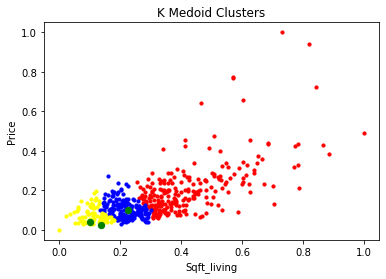

In [76]:
for i in range(0,len(c1)):
    plt.scatter(c1[i][0],c1[i][1],s=10,c='red',label='Cluster 1')
for i in range(0,len(c2)):
    plt.scatter(c2[i][0],c2[i][1],s=10,c='blue',label='Cluster 2')
for i in range(0,len(c3)):
    plt.scatter(c3[i][0],c3[i][1],s=10,c='yellow',label='Cluster 3')
plt.scatter(selected_cents[0][0],selected_cents[0][1], s = 40, c = 'green', label = 'medoids')
plt.scatter(selected_cents[1][0],selected_cents[1][1], s = 40, c = 'green', label = 'medoids')
plt.scatter(selected_cents[2][0],selected_cents[2][1], s = 40, c = 'green', label = 'medoids')
plt.title("K Medoid Clusters")
plt.xlabel("Sqft_living")
plt.ylabel("Price")
plt.show()